In [1]:
import tensorflow as tf

tf.__version__

'1.10.0'

In [31]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

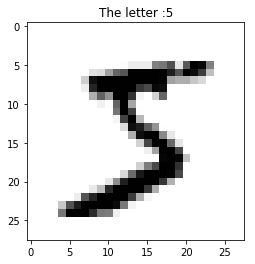

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title('The letter :' + str(y_train[0]))
plt.show()

In [37]:
import numpy as np
print(type(x_test))
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
x_train[0, 20:24, ]

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04117838, 0.16813739, 0.28960162, 0.32790981, 0.36833534,
        0.3689874 , 0.34978968, 0.25961929, 0.12760592, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04431706, 0.11961607,
        0.36545809, 0.37314701, 0.33153488, 0.32790981, 0.36833534,
        0.28877275, 0.111988  , 0.00258328, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05298497, 0.42752138, 0.4219755 , 0.45852825,
        0.43408872, 0.37314701, 0.33153488, 0.25273681, 0.11646967,
        0.01312603, 0.    

In [34]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train[0, 20:24, ]
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

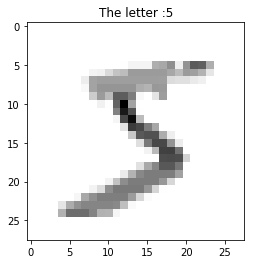

In [24]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title('The letter :' + str(y_train[0]))
plt.show()

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 10s 174us/step - loss: 0.2640 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 7s 113us/step - loss: 0.1070 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 7s 110us/step - loss: 0.0738 - acc: 0.9766


In [40]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 46us/step
0.09595072400867939 0.9694


In [42]:
model.save('basic_1')

new_model = tf.keras.models.load_model('basic_1')

In [43]:
val_loss, val_acc = new_model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/step
0.09595072400867939 0.9694


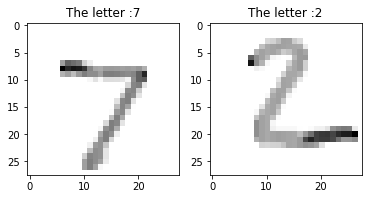

In [45]:
predictions = new_model.predict([x_test])

fig = plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title('The letter :' + str(np.argmax(predictions[0])))

plt.subplot(1, 2, 2)
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.title('The letter :' + str(np.argmax(predictions[1])))

# plt.subplot(2, 2, 3)
# plt.plot(x, y)

# plt.subplot(2, 2, 4)
# plt.plot(x, y)

plt.show()

In [46]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

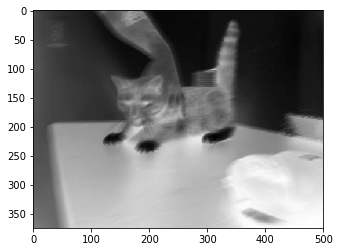

./Datasets/CatsAndDogs/PetImages\Cat\0.jpg


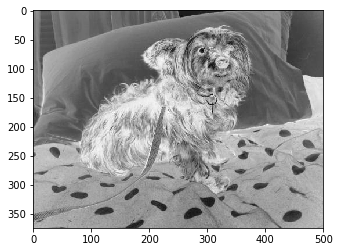

./Datasets/CatsAndDogs/PetImages\Dog\0.jpg


In [54]:
Dataset_Dir = './Datasets/CatsAndDogs/PetImages'
Categories = ['Cat', 'Dog']
for category in Categories:
    path = os.path.join(Dataset_Dir, category)
    for img_path in os.listdir(path):
        img_location = os.path.join(path, img_path)
        img = cv2.imread(img_location, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.show()
        print(img_location)
        break

In [59]:
dataset_catsanddogs = []

IMG_SIZE = 60

Dataset_Dir = './Datasets/CatsAndDogs/PetImages'
Categories = ['Cat', 'Dog']
for category in Categories:
    path = os.path.join(Dataset_Dir, category)
    for img_path in os.listdir(path):
        img_location = os.path.join(path, img_path)
        try:
            img = cv2.imread(img_location, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            dataset_catsanddogs.append([img, Categories.index(category)])
            print('successfully added')
        except Exception as ex:
            print('Couldnot load')
            print(str(ex))
        
print(len(dataset_catsanddogs))
print([dataset_catsanddogs[i] for i in range(0, 10)])

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bl

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
Couldnot load
OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfu

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully added
successfully

In [63]:
import random
random.shuffle(dataset_catsanddogs)

X_LIST = []
Y_LIST = []
for feature, label in dataset_catsanddogs:
    X_LIST.append(feature)
    Y_LIST.append(label)

X_LIST = np.array(X_LIST).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# print([dataset_catsanddogs[i][1] for i in range(0, 10)])

In [64]:
import shelve
catsdogs_db = shelve.open('catsdogs.db')
catsdogs_db['INITIAL_X'] = X_LIST
catsdogs_db['INITIAL_Y'] = Y_LIST

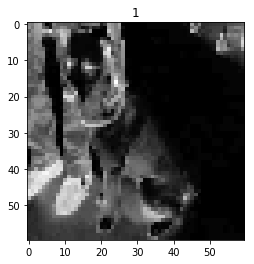

In [70]:
plt.imshow(catsdogs_db['INITIAL_X'][5].reshape(IMG_SIZE, IMG_SIZE), cmap=plt.cm.binary)
plt.title(catsdogs_db['INITIAL_Y'][5])
plt.show()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X_LIST / 255
Y = Y_LIST

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, batch_size=32, validation_split=0.1, epochs=10)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 343s 15ms/step - loss: 0.6422 - acc: 0.6293 - val_loss: 0.6011 - val_acc: 0.6645
Epoch 2/10
22451/22451 [==============================] - 317s 14ms/step - loss: 0.4809 - acc: 0.7710 - val_loss: 0.4912 - val_acc: 0.7627
Epoch 4/10
22451/22451 [==============================] - 330s 15ms/step - loss: 0.4480 - acc: 0.7931 - val_loss: 0.4867 - val_acc: 0.7627
Epoch 5/10
22451/22451 [==============================] - 345s 15ms/step - loss: 0.4174 - acc: 0.8109 - val_loss: 0.4551 - val_acc: 0.7880
Epoch 6/10
22451/22451 [==============================] - 330s 15ms/step - loss: 0.3924 - acc: 0.8251 - val_loss: 0.4200 - val_acc: 0.8100
Epoch 7/10
22451/22451 [==============================] - 331s 15ms/step - loss: 0.3674 - acc: 0.8358 - val_loss: 0.4384 - val_acc: 0.8036
Epoch 8/10
22451/22451 [==============================] - 279s 12ms/step - loss: 0.3483 - acc: 0.8464 - val_loss: 0.4

In [75]:
model.save('catsanddogs_model_basic')